# Zillow real estate 
We propose a projetct on the Zillow real estate data from Quantl.com:
    https://www.quandl.com/data/ZILLOW-Zillow-Real-Estate-Research

The data contains real estate market indicators for thousands of geographical areas (State, City, Zip, etc.) across the United States.

## Find the geographical area where house price is increasing
We first explore the home prices for different states. The following code downloads and plots the Median Listing Price for All Homes (MLPFAH) for 5 states between 2010-01-31 and 2019-01-31. 

The plot shows that listing price of California is the highest and increases aggressively during the last 9 years. Listing price in Alska is the 2nd high, but it rarely increased during the last 9 years. From the plot, we can imply that price of houses in California and Arizona have more potential to increase.

The dataset also contains the listing prices for all zipcodes or cities across US. In the project, I plan to identify the geographic areas where the house price increases more than their nearby area. To do this, latitude and longitude of geographic area may be used to identify the neighborhood of an area.


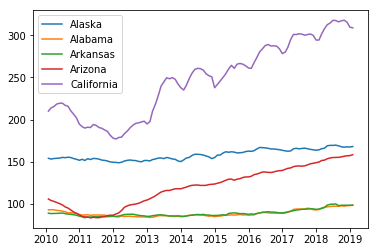

In [2]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt

code_state = {
2:'Alaska',
3:'Alabama',
4:'Arkansas',
5:'Arizona',
6:'California'}

indicators = ['MLPFAH'] # MLPAH is Median Listing Price - All Homes
flag = 0

'''
Download data from Quantl using python API
output dataframe is df. 
df has 5 columns of states
'''
for s,state in code_state.items():
    for ind in indicators:
        if not flag: # if df is not assigned
            flag = 1
            df = quandl.get('ZILLOW/S'+str(s)+'_'+ind, start_date='2010-01-31', end_date='2019-01-31') 
            df.rename(columns={'Value':state}, inplace=True)
        df[state] = quandl.get('ZILLOW/S'+str(s)+'_'+ind, start_date='2010-01-31', end_date='2019-01-31')
        
plt.plot(df)
plt.legend(code_state.values())
plt.show()

## Predict trend using prices of different type of real estate

There are about 100 indicators provided in the dataset. Using the dataset, I can also find the type of house that increases most slowly during the past years.

The following script downloads and plots the Median Listing Price for different type of houses in California state from 2012-01-31 to 2019-01-31. The prices are normalized by the price on 2012-01-31.

The plot indicates that the price for Dupplex/Triplex increased most, while real estates of 5 bedrooms increased least. **However, the price of 5B was the highest in the year of 2013. At that time, the real estate price of California is only slow, and it soars in the following year. In 2013, people are coming into California. 5B is popular because it is cheaper. However, as people are geting rich and economic is more developed, there is greater demand for better houses like Duplex/Triplex. So in recent years, we see a great increase of price of Duplex/Triplex.**

**In this project, I want to predict the future real estate price based on the price difference among different type of housing. A machine learning model (RNN or ANN) can be built to predict the future increase of real estate price. The model may take indicators such as (prices of different type of housing, sales volume) to predict future trend of housing.**

The short name of indicators are: 
    Median Listing Price - All Homes|MLPAH
    Median Listing Price - Condo/Co-op|MLPCC
    Median Listing Price - Duplex/Triplex|MLPDT
    Median Listing Price - Five Or More Bedrooms|MLP5B
    Median Listing Price - Four Bedrooms|MLP4B
    Median Listing Price - Three Bedrooms|MLP3B
    Median Listing Price - Two Bedrooms|MLP2B
    Median Listing Price - One Bedroom|MLP1B

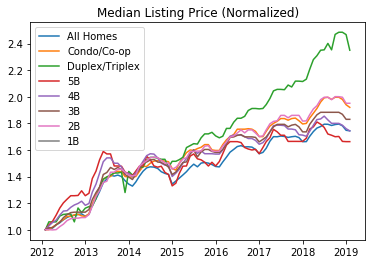

In [41]:

s=6
inds = ['MLPFAH', 'MLPCC', 'MLPDT', 'MLP5B', 'MLP4B', 'MLP3B', 'MLP2B', 'MLP1B']
legs = ['All Homes', 'Condo/Co-op', 'Duplex/Triplex', '5B', '4B', '3B', '2B', '1B']
flag=0
for ind,leg in zip(inds,legs):
    if not flag: # if df is not assigned
        flag = 1
        df2 = quandl.get('ZILLOW/S'+str(s)+'_'+ind, start_date='2012-01-31', end_date='2019-01-31') 
        df2.rename(columns={'Value':leg}, inplace=True)
    df2[leg] = quandl.get('ZILLOW/S'+str(s)+'_'+ind, start_date='2010-01-31', end_date='2019-01-31')


plt.title('Median Listing Price (Normalized)')
plt.plot(df2/df2.iloc[0,:])
plt.legend(legs)
plt.show()

## Rent vs. Buy?

We also investigated the rental prices for different type of houses. Interestingly, it is 1B that increases the most throughout 2012 to 2019. 

Here, we plotted the ratio of the rental price over listing price. For all the type of real estates, this ratio decreases, meaning that buying a real estate is more expensive than renting. Among all the type of real estates, the ratio of rental over listing prices increased most for Duplex/Triplex. This ratio has dropped to ~0.6 in over the past 7 years.

The short name of indicators are: 
    Median Rental Price - All Homes|MRPAH
    Median Rental Price - Condo/Co-op|MRPCC
    Median Rental Price - Duplex/Triplex|MRPDT
    Median Rental Price - Five Or More Bedrooms|MR51B
    Median Rental Price - Four Bedrooms|MRP4B
    Median Rental Price - Three Bedrooms|MRP3B
    Median Rental Price - Two Bedrooms|MRP2B
    Median Rental Price - One Bedroom|MRP1B

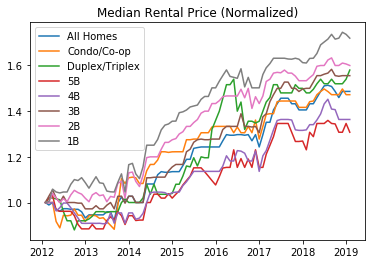

In [42]:
s=6
inds2 = ['MRPAH', 'MRPCC', 'MRPDT', 'MR51B', 'MRP4B', 'MRP3B', 'MRP2B', 'MRP1B']
legs = ['All Homes', 'Condo/Co-op', 'Duplex/Triplex', '5B', '4B', '3B', '2B', '1B']
flag=0
for ind,leg in zip(inds2,legs):
    if not flag: # if df is not assigned
        flag = 1
        df3 = quandl.get('ZILLOW/S'+str(s)+'_'+ind, start_date='2012-01-31', end_date='2019-01-31') 
        df3.rename(columns={'Value':leg}, inplace=True)
    df3[leg] = quandl.get('ZILLOW/S'+str(s)+'_'+ind, start_date='2012-01-31', end_date='2019-01-31')

plt.title('Median Rental Price (Normalized)')
plt.plot(df3/df3.iloc[0,:])
plt.legend(legs)
plt.show()

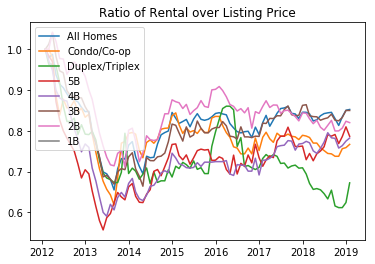

In [44]:
plt.title('Ratio of Rental over Listing Price')
df_rl = df3/df2
plt.plot(df_rl/df_rl.iloc[0,:])
plt.legend(legs)
plt.show()